In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
np.random.seed(1)

In [4]:
# load data
data = pd.read_csv('House_Data.csv') #data stored in a structure DataFrame
print(data.shape)

(21613, 21)


In [5]:
# converting dataframe to numpy array
#X = data.iloc[:,3:]
X = data.loc[:1000,['sqft_living','sqft_lot','sqft_above']]
Y = data.loc[:1000,'price']

print(np.any(X.isnull()==True))

X = X.to_numpy()
Y = Y.to_numpy() #convert to numpy array
print(X.shape, Y.shape)


False
(1001, 3) (1001,)


In [6]:
#data normalization, to make the contribution from factors to prediciton equal, to [0 1], to [0.05 0.95], (X-Xmin)/(Xmax-Xmin)*0.9+0.05
X_Norm = np.zeros((X.shape[0],X.shape[1]))
for i in range(X.shape[1]):
    data_ = X[:,i]
    X_Norm[:,i] = (data_-np.amin(data_))/(np.amax(data_)-np.amin(data_))

Y_Min = np.min(Y)
Y_Max = np.max(Y)
Y_Norm = (Y-Y_Min)/(Y_Max-Y_Min) #because of the output range of activiation function

In [7]:
# data splitting, build training and testing data; 70% for training, 30% for testing
m = 0.7 * X.shape[0]
m = np.ceil(m) # round the number, or using floor fuction
m = int(m)
X_Train = X_Norm[:m,:]
Y_Train = Y_Norm[:m]
X_Test = X_Norm[m:,:]
Y_Test = Y_Norm[m:]
Y_Train = np.reshape(Y_Train,(len(Y_Train),1))
Y_Test = np.reshape(Y_Test,(len(Y_Test),1))
print(X_Test.shape, Y_Test.shape)

(300, 3) (300, 1)


In [8]:
# define sigmoid function and derivation
def sigmoid(x):
    output = 1/(1+np.exp(-x))
    return output
def sigmoid_der(output):
    return output*(1-output)

In [9]:
#define a 3-layer perceptron, feedforward and back-propagation
class NeuralNetwork():
    def __init__(self,x,y,layer_numbers,learning_rate,iterations): #layer_numbers: [6, 10, 1], role of initialization funcition is make local variables as global variables
        self.input = x
        self.y = y
        self.layer_numbers = layer_numbers
        self.learning_rate = learning_rate
        self.iterations = iterations
        #define network structure
        self.W0 = np.random.rand(self.layer_numbers[0], self.layer_numbers[1]) #6*10
        self.W1 = np.random.rand(self.layer_numbers[1], self.layer_numbers[2]) #10*1
        #for the purpose of learning curve plot
        self.iteration = []
        self.error_history = []
    
    def forward(self): #with self as input variable, we can call all variables that starts with self.
        self.hidden_output = sigmoid(np.dot(self.input, self.W0)) #sigmoid(w0*x)
        self.output = sigmoid(np.dot(self.hidden_output, self.W1)) #sigmoid(w1*h)
    
    def backpropagation(self):
        self.loss=np.sum((self.output-self.y)**2)/2
        d_W1 = np.dot(self.hidden_output.T, (self.output-self.y)*sigmoid_der(self.output))  #hT*(y-yactual)y(1-y)
        layer_error1 = np.dot((self.output-self.y)*sigmoid_der(self.output),self.W1.T) #dJ/dh=dJ/dy*dy/dh
        d_W0 = np.dot(self.input.T, layer_error1*sigmoid_der(self.hidden_output)) #dJ/dh*dh/dW0
        
        self.W0 = self.W0 - self.learning_rate*d_W0
        self.W1 = self.W1 - self.learning_rate*d_W1 
    
    def train(self):
        for i in range(self.iterations):
            self.forward()
            self.backpropagation()
            self.iteration.append(i)
            self.error_history.append(self.loss)
    
    def predict(self,new_data):
        hidden_output = sigmoid(np.dot(new_data, self.W0)) #sigmoid(w0*x)
        output = sigmoid(np.dot(hidden_output, self.W1)) #sigmoid(w1*h)
        return output

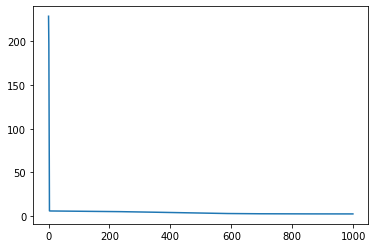

In [10]:
layer_numbers = [3,10,1] #2*input variable numbers +1
learning_rate = 0.01
iterations = 1000
Net = NeuralNetwork(X_Train,Y_Train,layer_numbers,learning_rate,iterations) #build on object that inherits the class
Net.train()
plt.figure()
plt.plot(Net.iteration,Net.error_history)


(300, 1) (300, 1)


(80000.0, 3075000.0)

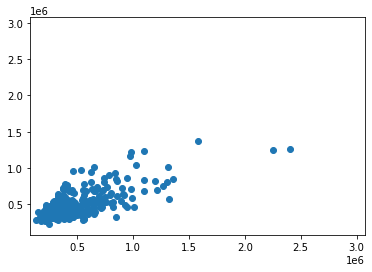

In [11]:
#prediction
y_predict = Net.predict(X_Test)
y_predicted = y_predict*(Y_Max-Y_Min) + Y_Min
Y_Test = Y_Test*(Y_Max-Y_Min) + Y_Min
print(Y_Test.shape, y_predicted.shape)
plt.scatter(Y_Test,y_predicted)
plt.xlim(Y_Min,Y_Max)
plt.ylim(Y_Min,Y_Max)

In [12]:
def R2(Y_actual,Y_prediction):
    sst=np.sum((Y_actual-Y_actual.mean())**2)
    ssr=np.sum((Y_actual-Y_prediction)**2)
    r2 = 1-(ssr/sst)
    return r2
R2(Y_Test,y_predicted)

0.493324843383537